# Projet : Corrélation entre toponymie et lieu géographique descommunes françaises : à la recherche de Triffouillis-les-Oies, Julie Fraval



In [1]:
import pandas as pd
import folium

In [2]:
import numpy as np
import os
os.chdir("C:/Users/julie/OneDrive/Bureau")

In [3]:
from scipy import misc
import scipy.stats as stats

In [4]:
import statsmodels.api as sm

C:\Users\julie\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv(
    "data2011.csv", sep="\t",encoding="latin-1")

df["latitude"]=df["latitude"]*180/np.pi
df["longitude"]=df["longitude"]*180/np.pi
df["nom"] = df["nom"].map(str.lower)

df

,insee,nom,altitude,code_postal,longitude,latitude,pop99,surface,departement,region,indicatif
0,1001,l'abergement-clémenciat,257.0,1400,4.919167,46.152222,728,15.70,1,RA,4
1,1002,l'abergement-de-varey,367.0,1640,5.423889,46.007778,168,9.14,1,RA,4
2,1004,ambérieu-en-bugey,247.0,1500,5.348889,45.956112,11436,24.51,1,RA,4
3,1005,ambérieux-en-dombes,293.0,1330,4.904167,45.996113,1408,16.06,1,RA,4
4,1006,ambléon,400.0,1300,5.602222,45.750278,86,6.03,1,RA,4
...,...,...,...,...,...,...,...,...,...,...,...
36204,95676,villers-en-arthies,150.0,95510,1.726667,49.088890,426,8.43,95,IF,1
36205,95678,villiers-adam,130.0,95840,2.235278,49.063057,775,9.89,95,IF,1
36206,95680,villiers-le-bel,104.0,95400,2.389167,49.005833,26145,7.27,95,IF,1
36207,95682,villiers-le-sec,130.0,95720,2.390833,49.071388,168,3.21,95,IF,1


# Partie 1 : régression linéaire


In [6]:
alphabet = ["a", "à", "b", "c", "ç", "d", "e", "é", "è", "ê", "ë", "f", "g", "h", "i","ï", "î","j", "k", "l", "m",
            "n", "o", "ô", "ö", "p", "q", "r", "s", "t", "u", "û", "v", "w", "x", "y", "z", " ", "-"]

df_letters = pd.DataFrame()

#Occurence des lettres

for letter in alphabet :
    
    df_current = df["nom"].str.count(letter) 
    #Notre filtre count les occurrences de chaque lettre
 
    df_current.rename(letter.upper(), inplace=True)
    #Rebaptisation de la colonne
    
    if df_current.sum()!= 0:
         df_letters = pd.concat([df_letters, df_current], axis="columns")
        #concaténation de la dataframe par rapport aux colonnes

# longueur du nom
df_current = df["nom"].str.len() 
df_current.rename("Longueur", inplace=True)
df_letters = pd.concat ([df_letters, df_current], axis="columns")

df_letters


,A,À,B,C,Ç,D,E,É,È,Ê,...,T,U,Û,V,W,X,Y,Z,-,Longueur
0,2,0,1,2,0,0,4,1,0,0,...,2,0,0,0,0,0,0,0,1,23
1,2,0,1,0,0,1,5,0,0,0,...,1,0,0,1,0,0,1,0,2,21
2,1,0,2,0,0,0,3,1,0,0,...,0,2,0,0,0,0,1,0,2,17
3,1,0,2,0,0,1,3,1,0,0,...,0,1,0,0,0,1,0,0,2,19
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36204,1,0,0,0,0,0,3,0,0,0,...,1,0,0,1,0,0,0,0,2,18
36205,2,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,13
36206,0,0,1,0,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,2,15
36207,0,0,0,1,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,2,15


In [7]:
alphabet = ["a","à", "b", "c", "ç", "d", "e","é","è","ê","ë","f", "g", "h", "i","ï", "î", "j", "k", "l", "m",
            "n", "o", "ô", "ö", "p", "q", "r", "s", "t", "u", "û", "v", "w", "x", "y", "z", " ", "-"]

def from_word_to_vect(word,alphabet) :
    a = list()
   
    for letter in list(alphabet) :
        a.append(word.lower().count(letter.lower()))
        
    a[-1] = len(word)  
    return(np.array([a]))

Xcommune = from_word_to_vect('Triffouillis-les-Oies',list(df_letters))
print(Xcommune)

[[ 0  0  0  0  0  0  2  0  0  0  0  2  0  0  4  0  0  0  0  3  0  0  2  0
   0  0  1  3  1  1  0  0  0  0  0  0  2 21]]


In [8]:
y = df["latitude"] #mettre logitude à la place de latitude pour traiter la régression sur la longitude

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

X=df_letters
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
Lr= LinearRegression()
Lr = Lr.fit(X_train, y_train)
y_pred= Lr.predict(X_test)
print(mse(y_pred,y_test))
print(Lr.score(X_test,y_test))

4.048124566510558
0.13678752034006159


In [50]:
latitude=Lr.predict(Xcommune)
print(latitude)

[48.3654279]


In [51]:
A=Xcommune.dot(np.linalg.inv(np.transpose(X_train.to_numpy()).dot(X_train.to_numpy()))).dot(np.transpose(Xcommune))
n= len(X_train)
p= len(X_train.columns)
q=stats.t.ppf(1-0.4/2, df= n-p)
ICmax = Lr.predict(Xcommune)[0] + q * np.sqrt(mse(y_pred,y_test)*(1+A[0][0]))
ICmin = Lr.predict(Xcommune)[0] - q * np.sqrt(mse(y_pred,y_test)*(1+A[0][0]))

In [52]:
print([ICmin, ICmax])

[46.670003159435396, 50.0608526313506]


In [53]:
#Code utiliser pour obtenir les cartes avec la prédiction et son intervalle de prédiction

france = folium.Map(location=[46.856578,2.351828], zoom_start=6)
folium.Marker([49.35181062, 2.10656595], "X").add_to(france)

folium.CircleMarker(
    location=[47.78587995915951, 4.196135771155455],
    radius=1,
    fill=True,
    fill_color="#3186cc",
).add_to(france)

folium.CircleMarker(
    location=[47.78587995915951, 0.22194362100170206],
    radius=1,
    fill=True,
    fill_color="#3186cc",
).add_to(france)

folium.CircleMarker(
    location=[50.91774128901044, 0.22194362100170206],
    radius=1,
    fill=True,
    fill_color="#3186cc",
).add_to(france)

folium.CircleMarker(
    location=[50.91774128901044, 4.196135771155455],
    radius=1,
    fill=True,
    fill_color="#3186cc",
).add_to(france)

france

## Modèle avec interractions

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(df_letters)

array([[ 2.,  0.,  1., ...,  0.,  0., 23.],
       [ 2.,  0.,  1., ...,  0.,  0., 42.],
       [ 1.,  0.,  2., ...,  0.,  0., 34.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0., 30.],
       [ 0.,  0.,  0., ...,  0.,  0., 30.],
       [ 1.,  0.,  0., ...,  0.,  0., 57.]])

In [55]:
Xpoly = PolynomialFeatures(interaction_only=True,include_bias = False)
Xlat = Xpoly.fit_transform(Xcommune)

In [56]:
alphabet.append("longueur")
print(alphabet)
def interractions(liste):
    interractions=list()
    for i in range(len(liste)) : 
        for j in range(i) :
                interractions.append(liste[i]+liste[j])
    return(interractions)  

covariables = list(df_letters) + interractions(list(df_letters))
len(covariables)    
   

['a', 'à', 'b', 'c', 'ç', 'd', 'e', 'é', 'è', 'ê', 'ë', 'f', 'g', 'h', 'i', 'ï', 'î', 'j', 'k', 'l', 'm', 'n', 'o', 'ô', 'ö', 'p', 'q', 'r', 's', 't', 'u', 'û', 'v', 'w', 'x', 'y', 'z', ' ', '-', 'longueur']


741

In [57]:
X = pd.DataFrame(poly.fit_transform(df_letters),columns=covariables)
X

,A,À,B,C,Ç,D,E,É,È,Ê,...,LongueurS,LongueurT,LongueurU,LongueurÛ,LongueurV,LongueurW,LongueurX,LongueurY,LongueurZ,Longueur-
0,2.0,0.0,1.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
1,2.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,21.0,0.0,0.0,42.0
2,1.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,17.0,0.0,0.0,34.0
3,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,0.0,0.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,38.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36204,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
36205,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
36206,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
36207,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0


In [58]:
def forwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
#selected_cov,iterations_log = forwardSelection(X_train, y_train, model_type ="linear",elimination_criteria = "aic")
#sélection de variables qui durent plus de 8h

In [61]:
Lrplein= LinearRegression()
Lrplein.fit(X_train, y_train)
y_pred= Lrplein.predict(X_test)
print(mse(y_pred,y_test))

9.930917977630523e+17


In [62]:
'''
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

# Instantiate and fit the visualizer
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X, y)
visualizer_residuals.show()
'''


'\nfrom yellowbrick.regressor import CooksDistance\nfrom yellowbrick.datasets import load_concrete\nfrom sklearn.linear_model import LinearRegression\nfrom yellowbrick.regressor import ResidualsPlot\n\n# Instantiate and fit the visualizer\nmodel = LinearRegression()\nvisualizer_residuals = ResidualsPlot(model)\nvisualizer_residuals.fit(X, y)\nvisualizer_residuals.show()\n'

In [63]:
latitude=Lrplein.predict(Xlat)
print(latitude)

[47.84749522]


In [64]:
X0 = pd.DataFrame(Xlat, columns = X.columns.to_list())

In [65]:
selected_variable = ['A', 'Longueur', 'Y', 'MÏ', 'S', 'W', 'È', 'OC', 'XÏ', 'H', 'BÀ', 'NK', 'Z', 'ZR', 'K', 'PM', 'EÇ', 'O', 'TÎ', 'J', 'LÇ', 'ÈC', 'ÎH', 'UÊ', 'C', 'ÎE', 'F', 'JÇ', 'ÎË', '-J', 'UÏ', 'CB', '-È', 'OA', 'V', 'NJ', '-K', 'ED', '-R', 'XÎ', 'YM', 'Ï', 'LE', 'ÎG', 'ÉE', '-S', 'SK', 'UF', 'ÏG', 'JB', 'ZD', 'SB', 'IË', 'GÊ', 'LongueurM', 'M', 'XÔ', 'HC', 'ÈÉ', 'MA', 'YS', 'XU', 'JÉ', 'DB', 'NF', 'TQ', 'ÛÇ', 'ÛH', 'HE', 'YB', 'LongueurW', 'LongueurX', 'YW', 'LongueurÇ', 'UÎ', 'ÎÊ', 'YP', 'NÏ', 'ZÛ', 'TA', 'DÀ', 'MC', 'ÎÈ', 'ÏD', 'YK', 'XK', 'R', 'YR', 'UË', 'ZÔ', 'PI', 'PF', 'HA', 'UP', 'YL', 'ÏE', 'ÔF', 'ÔË', 'ÛF', 'E', 'XB', 'UL', 'YÔ', 'LÊ', 'WÈ', 'FÇ', '-T', 'U', 'IÈ', 'ÉC', 'Q', 'QG', '-W', 'ÈÇ', 'Ë', 'RQ', 'ÏF', 'TN', 'YÛ', 'ÛË', 'LÈ', 'WË', '-Ô', 'ÉA', 'PÈ', 'RH', 'XM', 'NÊ', 'ÏË', 'SÀ', 'NB', 'SÊ', 'SJ', 'MÉ', 'LongueurV', 'OÇ', 'LongueurY', 'LongueurL', 'TÀ', 'PO', '-Ê', 'YQ', 'ÉÇ', 'OE', 'OD', '-', 'ZÀ', 'ZB', 'VJ', '-É', 'ÈD', 'YX', 'IF', 'HD']

Lrselect= LinearRegression()
Lrselect.fit(X_train[selected_variable], y_train)
y_pred= Lrselect.predict(X_test[selected_variable])
print(mse(y_pred,y_test))
print(Lrselect.score(X_test[selected_variable],y_test))

3.8242225952185587
0.18453184556133717


In [66]:
len(selected_variable)

154

In [67]:
latitude=Lrselect.predict(X0[selected_variable])
print(latitude)

[48.77646458]


In [68]:
Xcommune = X0[selected_variable].to_numpy()
A=Xcommune.dot(np.linalg.inv(np.transpose(X_train[selected_variable].to_numpy()).dot(X_train[selected_variable].to_numpy()))).dot(np.transpose(Xcommune))
n= len(X_train[selected_variable])
p= len(X_train[selected_variable].columns)
q=stats.t.ppf(1-0.4/2, df= n-p)
ICmax = Lrselect.predict(Xcommune)[0] + q * np.sqrt(mse(y_pred,y_test)*(1+A[0][0]))
ICmin = Lrselect.predict(Xcommune)[0] - q * np.sqrt(mse(y_pred,y_test)*(1+A[0][0]))

In [69]:
print([ICmin, ICmax])

[47.12224595903557, 50.43068319815447]


## Bigrammes

In [10]:
#ajout des bigrammes
alphabet = ["a","à", "b", "c", "ç", "d", "e","é","è","ê","ë","f", "g", "h", "i","ï", "î", "j", "k", "l", "m",
            "n", "o", "ô", "ö", "p", "q", "r", "s", "t", "u", "û", "v", "w", "x", "y", "z", " ", "-"]

def bigrammes(alphabet):
    bigrammes = list()
    for i in alphabet :
        for j in alphabet :
            bigrammes.append(i+j)
    return(bigrammes)

covariablesbi = bigrammes(alphabet)
print(len(covariablesbi))

1521


In [11]:
df_lettersbi = pd.DataFrame()
##construction de la matrice des bigrammes (attendre 2 minutes)
#Occurence des lettres

for letter in covariablesbi :
    
    df_current = df["nom"].str.count(letter) 
    #Notre filtre count les occurrences de chaque lettre
 
    df_current.rename(letter.upper(), inplace=True)
    #Rebaptisation de la colonne
    
    if df_current.sum()!= 0:
        df_lettersbi = pd.concat([df_lettersbi, df_current], axis="columns")
        #concaténation de la dataframe par rapport aux colonnes
        
df_lettersbi

,AA,AÀ,AB,AC,AÇ,AD,AE,AË,AF,AG,...,-Q,-R,-S,-T,-U,-V,-W,-X,-Y,-Z
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36205,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36207,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
X = pd.concat([df_letters, df_lettersbi], axis="columns") #matrice des covariables monogrammes + bigrammes


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
selected_variable = ['A', 'Longueur', 'Y', '-D', 'YR', 'S', 'W', 'RT', 'SN', 'NV', 'AC', 'ET', 'È', 'H', 'LH', 'IS', 'NG', 'IL', 'EY', 'AS', 'GU', 'S-', 'O', 'Z', 'AD', 'PU', 'AM', 'CO', 'TZ', 'C', 'CQ', 'GA', 'VR', 'K', 'NC', 'OT', 'AA', 'EV', 'OL', 'EE', 'ST', 'OQ', 'MI', 'RR', 'IÈ', 'LÈ', 'WA', '-A', 'MA', 'VA', 'F', 'PL', 'CR', 'EI', 'NS', 'SP', 'AO', 'AI', 'SA', 'A-', 'AU', 'UY', 'EF', 'RI', '-V', 'GH', 'JU', 'HA', 'BI', 'IC', 'IM', 'ÉJ', 'YS', 'YG', 'DE', 'AN', 'SL', 'TT', 'TE', 'TI', 'IN', 'T-', 'ÉL', 'UÉ', 'SM', 'YM', 'ÈR', 'ÈV', 'Q-', 'TF', 'PP', 'IU', 'YH', 'LL', 'LT', 'OG', 'OI', 'ME', 'YC', 'UA', 'AÏ']
# après avoir fait la sélection de variables avec critère AIC
Lrselect= LinearRegression()
Lrselect.fit(X_train[selected_variable], y_train)
y_pred= Lrselect.predict(X_test[selected_variable])
print(mse(y_pred,y_test)) #MSE
print(Lrselect.score(X_test[selected_variable], y_test)) #R2

3.4471494931649156
0.2649380193558759


In [13]:
alphabet = ["a","à", "b", "c", "ç", "d", "e","é","è","ê","ë","f", "g", "h", "i","ï", "î", "j", "k", "l", "m",
            "n", "o", "ô", "ö", "p", "q", "r", "s", "t", "u", "û", "v", "w", "x", "y", "z", " ", "-"]

def from_word_to_vect(word,alphabet) :
    a = list()
   
    for letter in list(alphabet) :
        a.append(word.lower().count(letter.lower()))
          
    #return(np.array([a]))
    return(a)

Xcommune = from_word_to_vect('Triffouillis-les-Oies',list(df_letters))
Xcommune[-1] = len('Triffouillis-les-Oies')
Xcommune = Xcommune + from_word_to_vect('Triffouillis-les-Oies',list(df_lettersbi))
Xcommune = np.array([Xcommune])
print(len(Xcommune[0])) #vérification

786


In [81]:
X0 = pd.DataFrame(Xcommune, columns = X.columns.to_list())
X0 #x0 de Triffouillis-les-Oies en monogramme+bigrammes

,A,À,B,C,Ç,D,E,É,È,Ê,...,-Q,-R,-S,-T,-U,-V,-W,-X,-Y,-Z
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
latitude=Lrselect.predict(X0[selected_variable])
print(latitude)

[49.35181062]


In [83]:
Xcommune = X0[selected_variable].to_numpy()
A=Xcommune.dot(np.linalg.inv(np.transpose(X_train[selected_variable].to_numpy()).dot(X_train[selected_variable].to_numpy()))).dot(np.transpose(Xcommune))
n= len(X_train[selected_variable])
p= len(X_train[selected_variable].columns)
q=stats.t.ppf(1-0.4/2, df= n-p)
ICmax = Lrselect.predict(Xcommune)[0] + q * np.sqrt(mse(y_pred,y_test)*(1+A[0][0]))
ICmin = Lrselect.predict(Xcommune)[0] - q * np.sqrt(mse(y_pred,y_test)*(1+A[0][0]))

In [84]:
print([ICmin, ICmax])

[47.78587995915951, 50.91774128901044]


## Trigrammes

In [85]:
def trigrammes(alphabet):
    trigrammes = list()
    for i in list(df_lettersbi) :
            for j in alphabet :
                trigrammes.append(i.lower()+j)
    return(trigrammes)

covariablestri = trigrammes(alphabet)

In [86]:
'''
df_letterstri = pd.DataFrame()

#Occurence des lettres

for letter in covariablestri :
    
    df_current = df["nom"].str.count(letter) 
    #Notre filtre count les occurrences de chaque lettre
 
    df_current.rename(letter.upper(), inplace=True)
    #Rebaptisation de la colonne
    
    if df_current.sum()!= 0:
        df_letterstri = pd.concat([df_letterstri, df_current], axis="columns")
        #concaténation de la dataframe par rapport aux colonnes
        
df_letterstri
'''
#création de la matrice des trigrammes 
# très long donc téléchargement du résultat juste après

'\ndf_letterstri = pd.DataFrame()\n\n#Occurence des lettres\n\nfor letter in covariablestri :\n    \n    df_current = df["nom"].str.count(letter) \n    #Notre filtre count les occurrences de chaque lettre\n \n    df_current.rename(letter.upper(), inplace=True)\n    #Rebaptisation de la colonne\n    \n    if df_current.sum()!= 0:\n        df_letterstri = pd.concat([df_letterstri, df_current], axis="columns")\n        #concaténation de la dataframe par rapport aux colonnes\n        \ndf_letterstri\n'

In [12]:
df_letterstri = pd.read_csv(
    "trigramme_matrix.csv", index_col=0)
df_letterstri

,AAC,AAL,AAR,AAS,AÀS,AÀ-,ABA,ABB,ABE,ABÉ,...,-YO,-YR,-YT,-YV,-YY,-YZ,-ZA,-ZI,-ZO,-ZU
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ridge bigrammes

In [88]:
X = pd.concat([df_letters, df_lettersbi], axis="columns") #pour les bigrammes

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
import sklearn.linear_model as sklin
#optimisation du lambda
alphas = np.logspace(-3,8,20)
ridgeCV = sklin.RidgeCV(alphas = alphas, store_cv_values=True)
ridgeCV.fit(X_train, y_train)
mse_ridgeCV = ridgeCV.cv_values_.mean(axis = 0)

Text(0.5, 1.0, 'MSE for RidgeCV as a function of lambda')

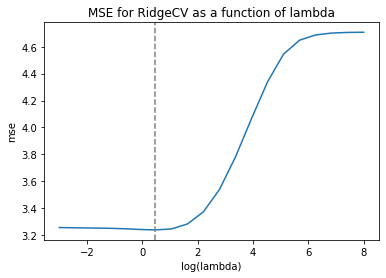

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.log(alphas)/np.log(10), mse_ridgeCV)
ax.axvline((np.log(alphas)/np.log(10))[np.argmin(mse_ridgeCV)], ls = '--', c = 'grey')
ax.set_xlabel('log(lambda)')
ax.set_ylabel('mse')
ax.set_title('MSE for RidgeCV as a function of lambda')

In [92]:
print(ridgeCV.alpha_) #lambda optimal pour Ridge

2.9763514416313193


In [93]:
linridge = sklin.Ridge(alpha=2.976).fit(X_train, y_train)
y_pred= linridge.predict(X_test)
print(mse(y_pred,y_test))
print(linridge.score(X_test,y_test))

3.233426338417277
0.31051183788327397


In [94]:
Xcommune = from_word_to_vect('Triffouillis-les-Oies',list(df_letters))
Xcommune[-1] = len('Triffouillis-les-Oies')
Xcommune = Xcommune + from_word_to_vect('Triffouillis-les-Oies',list(df_lettersbi))
Xcommune = np.array([Xcommune])
latitude=linridge.predict(Xcommune)
print(latitude)

[49.96304322]


## Lasso bigrammes

In [95]:
alphas = np.array([0.01,1,10])

In [96]:
'''
tentative d'une validation croisée pour Lasso
lassoCV = sklin.LassoCV(alphas = alphas, cv = len(y_train))
lassoCV.fit(X_train,y_train)
mse_lassoCV = lassoCV.mse_path_.mean(axis = 1)[::-1]
fig, ax = plt.subplots()
ax.plot(alphas, mse_lassoCV)
ax.axvline(alphas[np.argmin(mse_lassoCV)], ls = '--', c = 'grey')
ax.set_xlabel('lambda')
ax.set_ylabel('mse')
ax.set_title('MSE for LassoCV as a function of lambda')
'''


"\ntentative d'une validation croisée pour Lasso\nlassoCV = sklin.LassoCV(alphas = alphas, cv = len(y_train))\nlassoCV.fit(X_train,y_train)\nmse_lassoCV = lassoCV.mse_path_.mean(axis = 1)[::-1]\nfig, ax = plt.subplots()\nax.plot(alphas, mse_lassoCV)\nax.axvline(alphas[np.argmin(mse_lassoCV)], ls = '--', c = 'grey')\nax.set_xlabel('lambda')\nax.set_ylabel('mse')\nax.set_title('MSE for LassoCV as a function of lambda')\n"

In [97]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=0.001).fit(X_train, y_train)

C:\Users\julie\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.0794235196372, tolerance: 13.638582760256206
  positive)


In [98]:
y_pred= linlasso.predict(X_test)
print(mse(y_pred,y_test))
print(linlasso.score(X_test,y_test))

3.3255953784097407
0.29085793043734975


In [99]:
latitude=linlasso.predict(Xcommune)
print(latitude)

[49.77131858]


## Ridge trigrammes

In [14]:
X = pd.concat([df_letters, df_lettersbi, df_letterstri], axis="columns") # matrices des covariables monogrammes + bigrammes + trigrammes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
Xcommune = from_word_to_vect('Triffouillis-les-Oies',list(df_letters))
Xcommune[-1] = len('Triffouillis-les-Oies')
Xcommune = Xcommune + from_word_to_vect('Triffouillis-les-Oies',list(df_lettersbi)) + from_word_to_vect('Triffouillis-les-Oies',list(df_letterstri))
Xcommune = np.array([Xcommune])#x0 de Triffouillis-les-Oies avec les covariables monogrammes + bigrammes + trigrammes
print(len(Xcommune[0]))

7437


In [16]:
#optimisation du lambda par validation croisée pour Ridge
import sklearn.linear_model as sklin
alphas = np.array([6,7,8,9,10])
ridgeCV = sklin.RidgeCV(alphas = alphas, store_cv_values=True)
ridgeCV.fit(X_train, y_train)
mse_ridgeCV = ridgeCV.cv_values_.mean(axis = 0)

Text(0.5, 1.0, 'MSE for RidgeCV as a function of lambda')

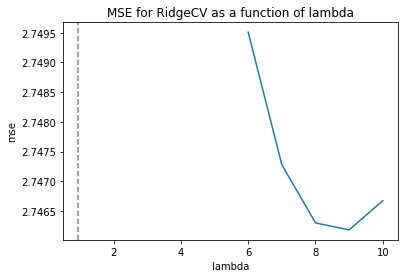

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(alphas, mse_ridgeCV)
ax.axvline((np.log(alphas)/np.log(10))[np.argmin(mse_ridgeCV)], ls = '--', c = 'grey')
ax.set_xlabel('lambda')
ax.set_ylabel('mse')
ax.set_title('MSE for RidgeCV as a function of lambda')

In [21]:
print(ridgeCV.alpha_) #lambda optimal pour Ridge

9


In [22]:
linridge = sklin.Ridge(alpha=9).fit(X_train, y_train)
y_pred= linridge.predict(X_test)
print(mse(y_pred,y_test))
print(linridge.score(X_test,y_test))

2.755532730218082
0.41241673724333827


In [23]:
latitude=linridge.predict(Xcommune)
print(latitude)

[48.3477663]


## Lasso trigrammes

In [19]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=0.001).fit(X_train, y_train)
y_pred= linlasso.predict(X_test)
print(mse(y_pred,y_test))
print(linlasso.score(X_test,y_test))

C:\Users\julie\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.014397281745914, tolerance: 13.638582760256206
  positive)


2.9815428242044066
0.364222880939583


In [20]:
latitude=linlasso.predict(Xcommune)
print(latitude)

[49.55459719]


## Random forest

In [21]:
X = pd.concat([df_letters, df_lettersbi, df_letterstri], axis="columns") #pour les monogrammes+bigrammes+trigrammes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
#Validation croisée pour Random forest
'''
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'n_estimators': [100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
'''

In [22]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor(bootstrap= True,
 n_estimators= 30, #nombre d'arbres
)
Rf.fit(X_train, y_train)
print(Rf.score(X_train, y_train),Rf.score(X_test, y_test))
# on observe bien un surapprentissage 

0.8872570327659103 0.38157147642171396


In [23]:
y_pred= Rf.predict(X_test)
print(mse(y_pred,y_test))

2.9001847840688715


In [24]:
latitude=linlasso.predict(Xcommune)
print(latitude)

[49.55459719]


## PCA sur les bigrammes

In [64]:
#On effectue on PCA
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
# Define the PCA object
pca = PCA()

# Preprocess (2) Standardize features by removing the mean and scaling to unit variance
Xstd = StandardScaler().fit_transform(X)

# Run PCA producing the reduced variable Xreg and select the first pc components
Xreg = pca.fit_transform(Xstd)[:,:500]

#print(pca.explained_variance_/sum(pca.explained_variance_)*100)

In [77]:
cumvar=np.cumsum(pca.explained_variance_/sum(pca.explained_variance_)*100)

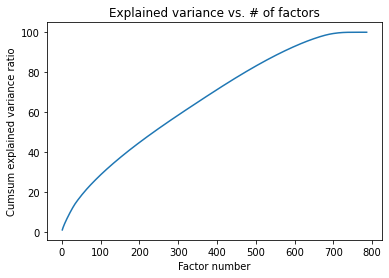

In [78]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,787),cumvar)
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
X_trainACP, X_testACP, y_trainACP, y_testACP = train_test_split(Xreg, y, test_size=0.2, random_state=0)

In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_trainACP, y_trainACP)

LinearRegression()

In [102]:
regressor.score(X_testACP, y_testACP)

0.21233356249546476

In [104]:
y_pred= regressor.predict(X_testACP)
print(mse(y_pred,y_test))

3.693843556495032


In [82]:
print(regressor.intercept_)
print(y.describe())

47.02081037889455
count    36209.000000
mean        47.023851
std          2.169044
min         42.361389
25%         45.246666
50%         47.434723
75%         48.846943
max         51.073891
Name: latitude, dtype: float64


In [84]:
y_predACP = regressor.predict(X_testACP)
np.corrcoef(y_testACP, regressor.predict(X_testACP))**2

array([[1.       , 0.2434371],
       [0.2434371, 1.       ]])

In [85]:
df_test = pd.DataFrame({'Actual': y_testACP, 'Predicted': y_predACP})
df_test

,Actual,Predicted
23666,49.614723,47.045053
9210,47.433613,46.147569
27837,47.788334,48.589403
8312,45.304443,47.230062
23308,50.701942,48.145406
...,...,...
19925,48.461388,51.846430
16011,47.756943,47.810023
3060,42.981667,46.152971
17758,44.475277,46.562113


In [109]:
y_testACP

23666    49.614723
9210     47.433613
27837    47.788334
8312     45.304443
23308    50.701942
           ...    
19925    48.461388
16011    47.756943
3060     42.981667
17758    44.475277
25530    45.790558
Name: latitude, Length: 7242, dtype: float64

In [86]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testACP, y_predACP))
print('Mean Squared Error:', metrics.mean_squared_error(y_testACP, y_predACP))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testACP, y_predACP)))

Mean Absolute Error: 1.552902904690942
Mean Squared Error: 3.548218418644826
Root Mean Squared Error: 1.8836715262074823


In [105]:
df["nom"][27837]

'kingersheim'

In [106]:
#Code utiliser pour obtenir les cartes avec la prédiction et son intervalle de prédiction

france = folium.Map(location=[46.856578,2.351828], zoom_start=6)
folium.Marker([47.788334, 7.334444], "X").add_to(france)
folium.Marker([48.589403, 8.107961], "X").add_to(france)

france